In [1]:
%matplotlib inline

In [2]:
import numpy as np
import time

import evaluator

## Plot

In [3]:
import matplotlib
import matplotlib.pyplot as plt

In [4]:
def plot_seg(seg, border=False):
    cmap = np.random.rand(len(np.unique(seg)),3)
    if border:
        cmap[0,:] = 0
    cmap = matplotlib.colors.ListedColormap(cmap)
    plt.imshow(seg, cmap=cmap)

## Arguments

In [5]:
from types import SimpleNamespace

In [35]:
# Segmentation 1
d = dict()

d['gs_input'] = 'gs://neuroglancer/kisuk/SNEMI3D/test/models/SNEMI3D/direct/long/aug4/mip0_depth4_patch160-20_bn_elu/bce/iter_270000/fov256-20/static/aug16/aff'
d['dtype']   = 'float32'
d['in_mip']  = 0
# d['begin']   = (256,256,0)
d['begin']   = None
d['end']     = None
d['center']  = None
# d['size']    = (512,512,100)
d['size']    = None
d['cache']   = True
d['parallel'] = 8

opt = SimpleNamespace(**d)

In [36]:
# # Segmentation 2 (ground truth)
# d = dict()

# d['gs_input'] = 'gs://neuroglancer/kisuk/SNEMI3D/train/crop_x512_y512_z100/seg'
# d['dtype']   = 'uint32'
# d['in_mip']   = 0
# d['begin']   = (256,256,0) 
# d['end']     = None
# d['center']  = None
# d['size']    = (512,512,100)
# d['cache']   = True
# d['parallel'] = 8

# opt = SimpleNamespace(**d)

## CloudVolume

In [37]:
aff = evaluator.cutout(opt, dtype=opt.dtype)

gs://neuroglancer/kisuk/SNEMI3D/test/models/SNEMI3D/direct/long/aug4/mip0_depth4_patch160-20_bn_elu/bce/iter_270000/fov256-20/static/aug16/aff
begin = [0 0 0]
end = [1024 1024  100]
mip 0 = [slice(0, 1024, None), slice(0, 1024, None), slice(0, 100, None)]
mip 0 = [slice(0, 1024, 1), slice(0, 1024, 1), slice(0, 100, 1)]


Downloading: 444it [01:02,  4.82it/s]                         
Downloading: 446it [01:05, 20.32it/s]                         
Downloading: 446it [01:09,  4.22it/s]                         
Downloading: 446it [01:10, 11.79it/s]                         
Downloading: 446it [01:10,  2.13it/s]                         
Downloading: 446it [01:10,  9.46it/s]                         
Downloading: 446it [01:10,  7.87it/s]                         
Downloading: 444it [01:11,  5.79it/s]                         


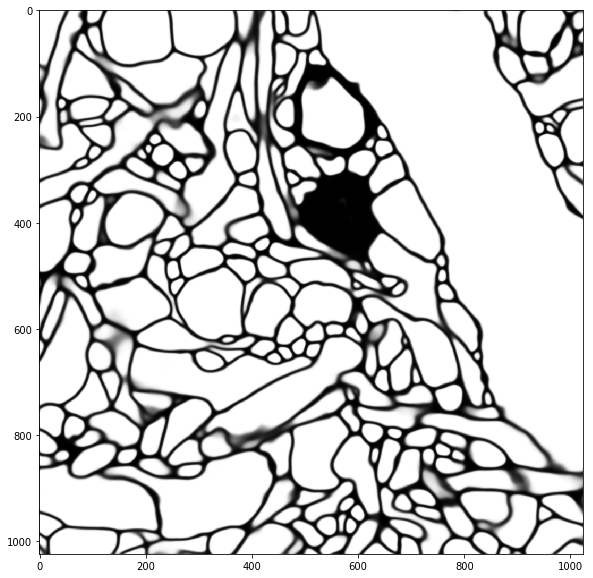

In [38]:
z = 50
plt.figure(figsize=(10,10))
plt.imshow(aff[0,z,:,:], cmap='gray')
plt.show()

In [39]:
# xy = np.minimum(aff[0,...],aff[1,...])
# aff[0,...] = xy
# aff[1,...] = xy
# aff[2,...] = np.minimum(aff[2,...],xy)

In [40]:
# plt.figure(figsize=(10,10))
# plt.imshow(aff[0,z,:,:], cmap='gray')
# plt.show()

## HDF5

In [41]:
import h5py
import os

In [42]:
fpath = '~/pytorch-deepem/experiments/SNEMI3D/direct/long/aug4/mip0_depth4_patch160-20_bn_elu/bce/forward/iter_270000/fov256-20/static/aug16'
fpath = os.path.expanduser(fpath)
fpath = os.path.join(fpath, 'SNEMI3D_dataset2_affinity.h5')

In [43]:
if not os.path.exists(os.path.dirname(fpath)):
    os.makedirs(os.path.dirname(fpath))

In [44]:
with h5py.File(fpath, 'w') as f:
    f.create_dataset('/main', data=aff)